In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("processed_titanic.csv")
print("Данные загружены:", df.shape)

Данные загружены: (891, 9)


In [2]:

pip install matplotlib scikit-learn

  Using cached matplotlib-3.10.7-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp

In [4]:
# Подготовка данных для классификации
X_class = df.drop('Survived', axis=1)
y_class = df['Survived']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

# Создаем дерево решений для классификации
dt_classifier = DecisionTreeClassifier(
    max_depth=3,           # Ограничиваем глубину чтобы не переобучалось
    random_state=42
)

# Обучаем модель
dt_classifier.fit(X_train_class, y_train_class)

# Предсказания
y_pred_class = dt_classifier.predict(X_test_class)
y_pred_proba = dt_classifier.predict_proba(X_test_class)[:, 1]  # Вероятности для ROC

# Оценка точности
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f" Дерево решений (классификация) - Accuracy: {accuracy:.4f}")

 Дерево решений (классификация) - Accuracy: 0.8097


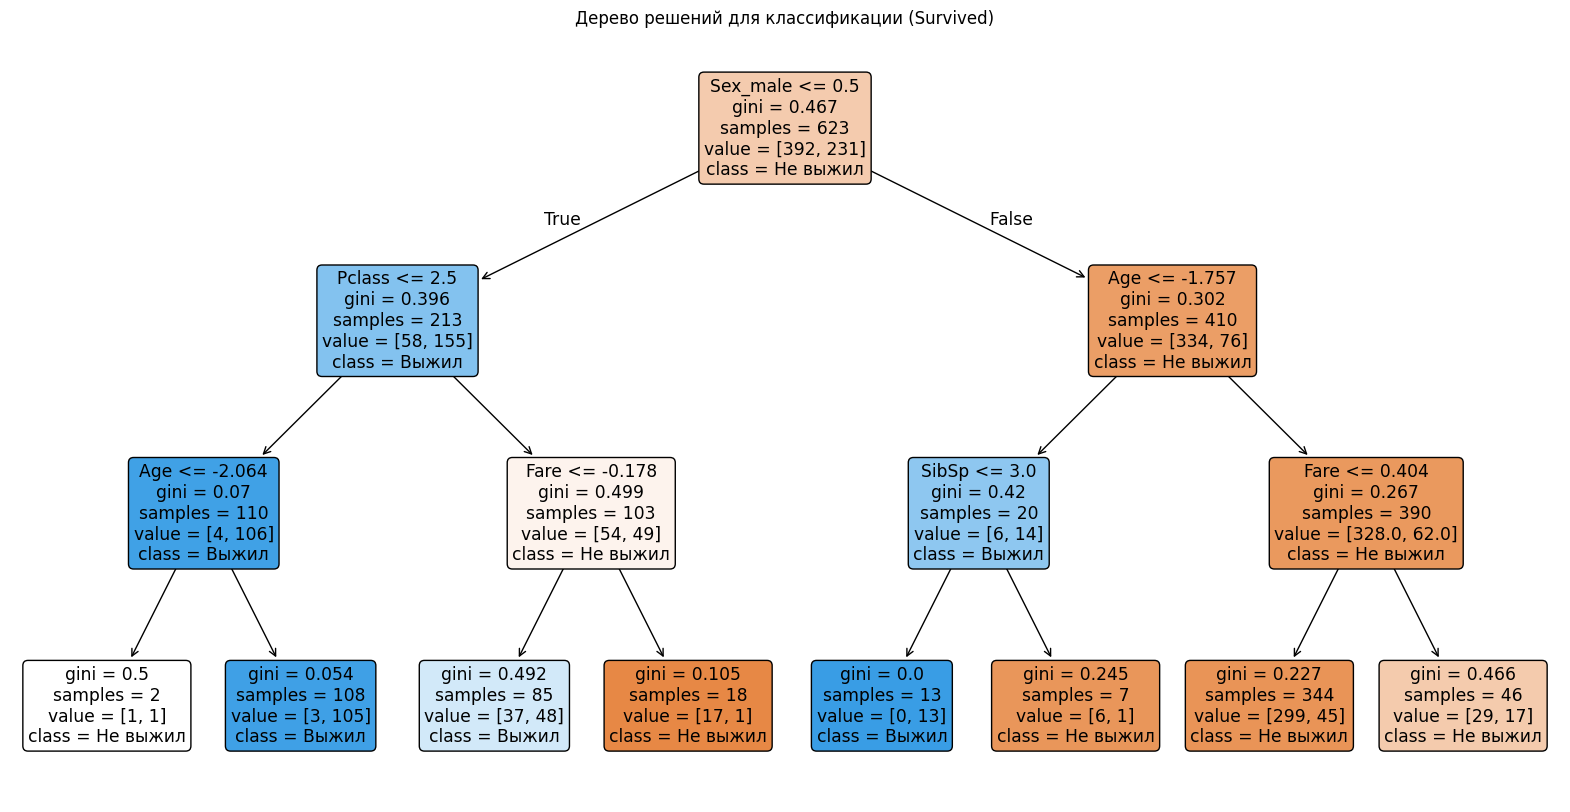

In [5]:
# Визуализируем дерево решений
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X_class.columns,
          class_names=['Не выжил', 'Выжил'],
          filled=True,
          rounded=True)
plt.title("Дерево решений для классификации (Survived)")
plt.savefig('decision_tree_classification.png', dpi=300, bbox_inches='tight')
plt.show()

 ROC-AUC для дерева решений: 0.8203


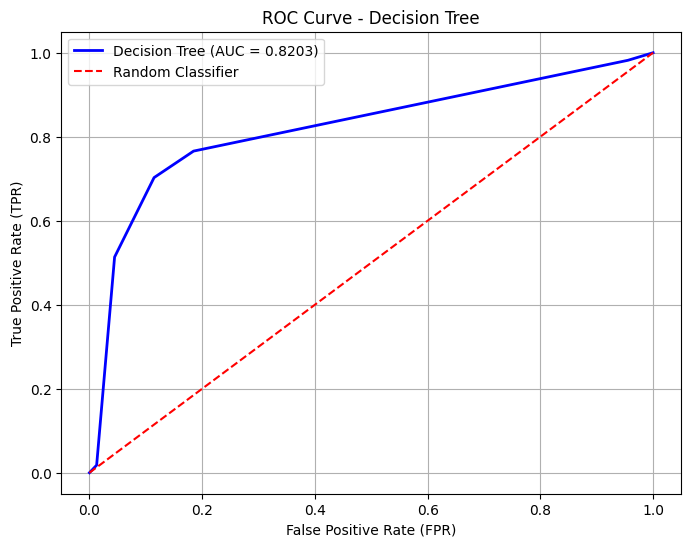

In [6]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_proba)
auc_score = roc_auc_score(y_test_class, y_pred_proba)

print(f" ROC-AUC для дерева решений: {auc_score:.4f}")

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'Decision Tree (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Подготовка данных для регрессии
X_reg = df.drop('Fare', axis=1)
y_reg = df['Fare']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Создаем дерево решений для регрессии
dt_regressor = DecisionTreeRegressor(
    max_depth=4,           # Ограничиваем глубину
    random_state=42
)

# Обучаем модель
dt_regressor.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = dt_regressor.predict(X_test_reg)

# Оценка качества
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f" Дерево решений (регрессия) - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

 Дерево решений (регрессия) - MSE: 0.4174, RMSE: 0.6461


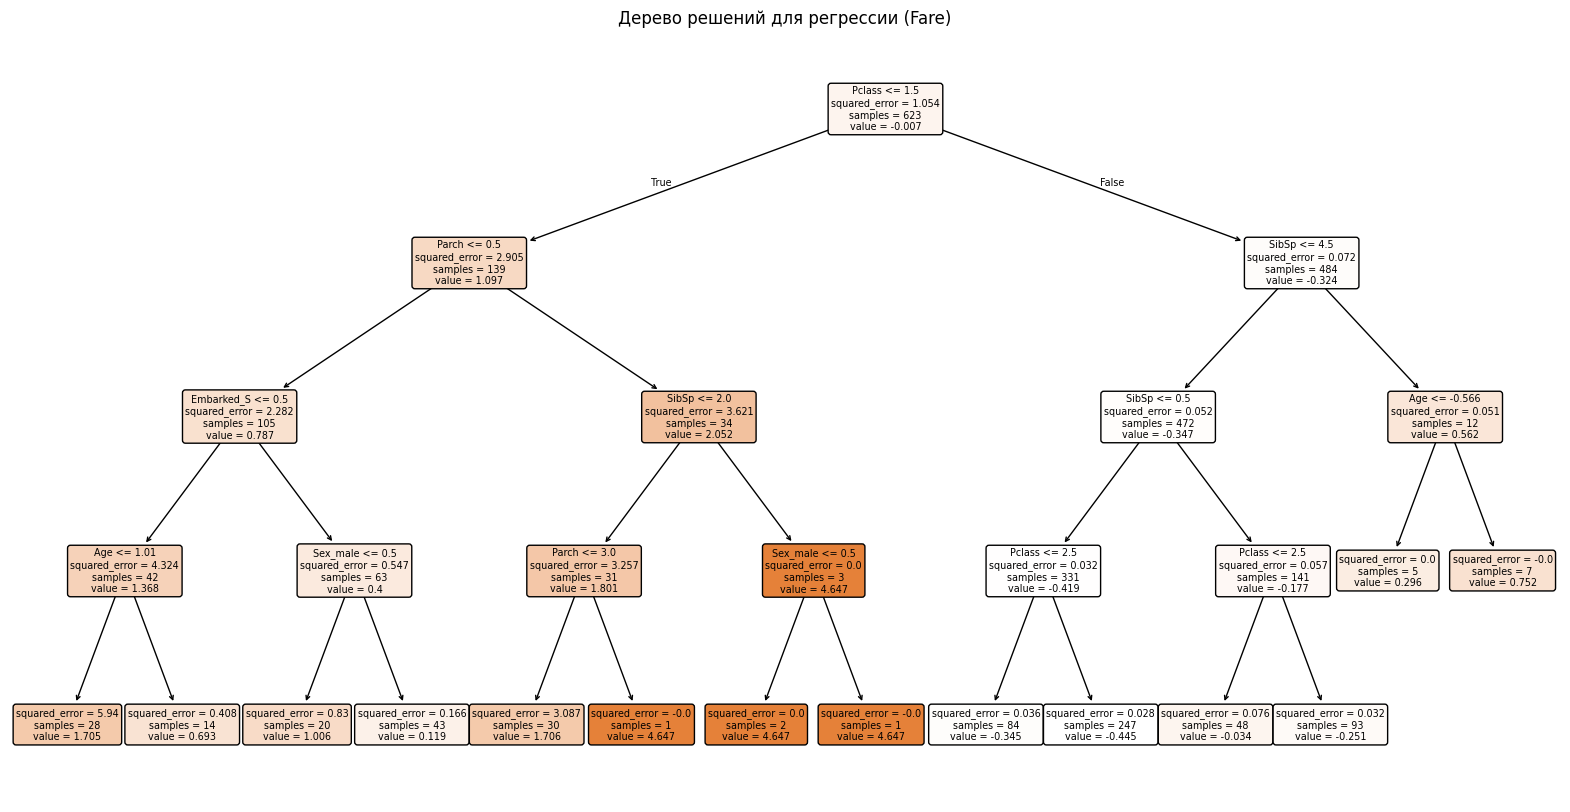

In [8]:
# Визуализируем дерево регрессии
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, 
          feature_names=X_reg.columns,
          filled=True,
          rounded=True)
plt.title("Дерево решений для регрессии (Fare)")
plt.savefig('decision_tree_regression.png', dpi=300, bbox_inches='tight')
plt.show()

 Сравнение ROC-AUC:
Дерево решений: 0.8203
Логистическая регрессия: 0.8806


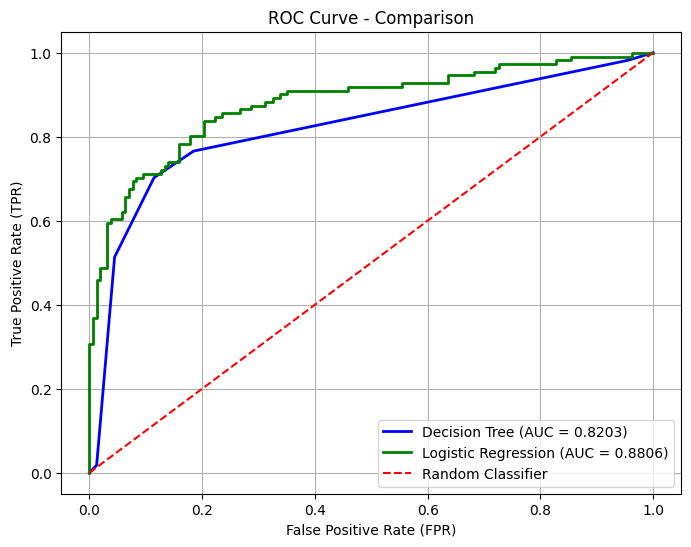

In [9]:
# Сравним с логистической регрессией из Лабы 2
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия для сравнения ROC-AUC
logreg = LogisticRegression()
logreg.fit(X_train_class, y_train_class)
y_pred_proba_lr = logreg.predict_proba(X_test_class)[:, 1]

# ROC-кривая для логистической регрессии
fpr_lr, tpr_lr, _ = roc_curve(y_test_class, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test_class, y_pred_proba_lr)

print(f" Сравнение ROC-AUC:")
print(f"Дерево решений: {auc_score:.4f}")
print(f"Логистическая регрессия: {auc_lr:.4f}")

# Сравнительная ROC-кривая
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'Decision Tree (AUC = {auc_score:.4f})')
plt.plot(fpr_lr, tpr_lr, color='green', linewidth=2, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Comparison')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Сохраняем результаты
results_df = pd.DataFrame({
    'Actual_Survived': y_test_class,
    'Predicted_Survived_DT': y_pred_class,
    'Survived_Probability_DT': y_pred_proba,
    'Survived_Probability_LR': y_pred_proba_lr,
    'Actual_Fare': y_test_reg,
    'Predicted_Fare_DT': y_pred_reg
})

results_df.to_csv("lab3_decision_trees_results.csv", index=False)